In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# carregando dados
df = pd.read_csv("../data/housing.csv", sep=',', encoding='utf-8')

In [3]:
# check 
df.head(3)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0


In [4]:
# check
df.shape

(489, 4)

## variaveis

In [5]:
# dependente e preditoras
X = df.iloc[:,0:3].values 
X_RM = df.iloc[:,0:1].values # numero de comodos
X_LSTAT = df.iloc[:,1:2].values # classe social
y = df.iloc[:,3].values # dependente

# metricas avaliadas
metricas = []

## Regressão em função do número de cômodos

In [6]:
# bases treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_RM, y, test_size = 0.3, random_state=10)

In [7]:
# check shape
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [8]:
# check shape
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [9]:
# regressor simples
reg_linear = LinearRegression()
reg_linear.fit(x_treino, y_treino)

LinearRegression()

In [10]:
# coeficiente linear
reg_linear.intercept_

-626510.2699464143

In [11]:
# coeficiente angular
reg_linear.coef_

array([173771.45170999])

In [12]:
# coeficiente de determinação dados de treino 
# esse coeficiente explica o modelo
reg_linear.score(x_treino, y_treino)

0.46368351515551953

In [13]:
# coeficiente de determinação (R²)
reg_linear.score(x_teste, y_teste)

0.5426573915930195

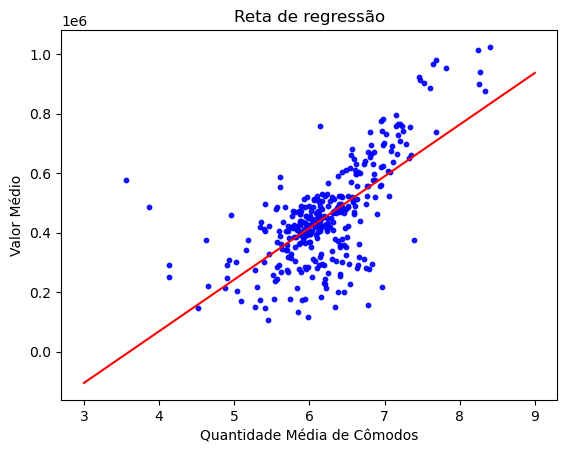

In [14]:
# plot treino
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear.coef_ + reg_linear.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade Média de Cômodos')
plt.show()

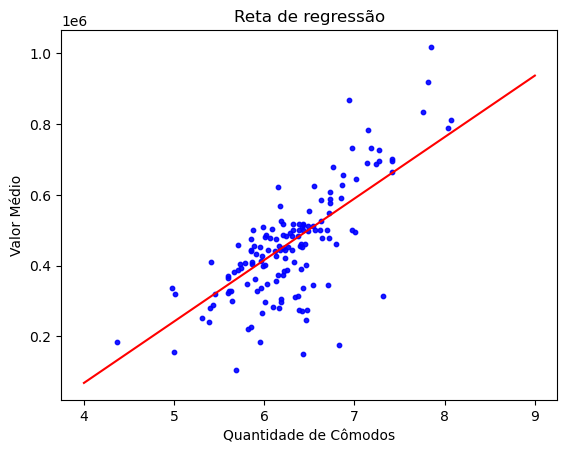

In [15]:
# plot teste
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(4, 9)
plt.plot(X_plot, X_plot*reg_linear.coef_ + reg_linear.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [16]:
# check modelo com valores distintos de cômodos
for i in range(3):
    comodos = np.random.randint(1,15)
    print(f'Comodos: {comodos} - Previsão: {reg_linear.predict([[comodos]])}')

Comodos: 3 - Previsão: [-105195.91481644]
Comodos: 12 - Previsão: [1458747.15057348]
Comodos: 10 - Previsão: [1111204.2471535]


In [17]:
# previsoes
y_pred = reg_linear.predict(x_teste)

In [18]:
# erro medio absoluto - MAE
mean_absolute_error(y_teste, y_pred)

76063.99733079868

In [19]:
# erro quadratico - MSE
mean_squared_error(y_teste, y_pred)

11294624525.740473

In [20]:
# raiz do erro quadrático - RSME
np.sqrt(mean_squared_error(y_teste, y_pred))

106276.17101561607

In [21]:
# validacao cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=5) 
modelo = LinearRegression()
result = cross_val_score(modelo,X_RM,y,cv=kfold)

print("Coef. determinação Médio: %.2f%%" % (result.mean() * 100.0))

Coef. determinação Médio: 47.77%


In [22]:
# registro das metricas
avaliacao = {
    'Regressão':'Simples',
    'Independentes':'RM',
    'R2':reg_linear.score(x_teste, y_teste),
    'R2_CV':result.mean(),
    'RSME':np.sqrt(mean_squared_error(y_teste, y_pred))
}
metricas.append(avaliacao)

## Regressão em função da classe social

In [23]:
# separando bases
x_treino, x_teste, y_treino, y_teste = train_test_split(X_LSTAT, y, test_size=0.3, random_state=10)

In [24]:
# check
print(x_treino.shape, y_treino.shape)
print(x_teste.shape, y_teste.shape)

(342, 1) (342,)
(147, 1) (147,)


In [25]:
# modelo
reg_linear_social = LinearRegression()
reg_linear_social.fit(x_treino, y_treino)

LinearRegression()

In [26]:
# coef linear
reg_linear_social.intercept_

681977.7451055486

In [27]:
# coef angular
reg_linear_social.coef_

array([-17263.75010515])

In [28]:
# coef determinacao R² treino
reg_linear_social.score(x_treino, y_treino)

0.5688289563355992

In [29]:
# coef determinicao R²
reg_linear_social.score(x_teste, y_teste)

0.6006038196307664

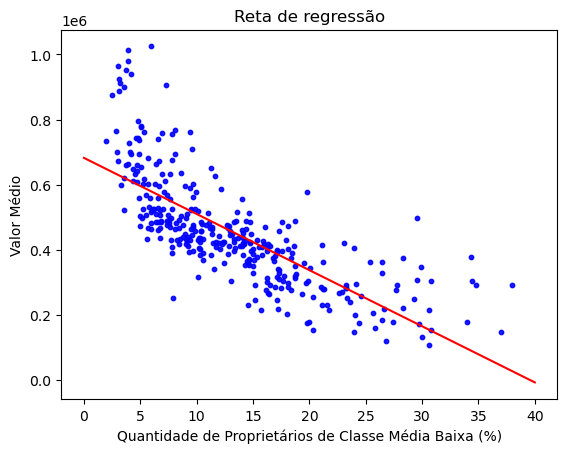

In [30]:
# plot treino
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*reg_linear_social.coef_ + reg_linear_social.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

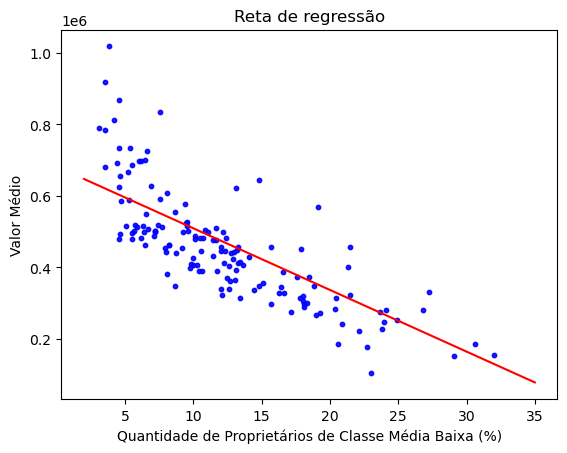

In [31]:
# plot teste
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 35)
plt.plot(X_plot, X_plot*reg_linear_social.coef_ + reg_linear_social.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [32]:
# check modelo com valores distintos de % classe social
for i in range(3):
    comodos = np.random.randint(20,55)
    print(f'Classe baixa: {comodos}% - Previsão: {reg_linear.predict([[comodos]])}')

Classe baixa: 54% - Previsão: [8757148.12239311]
Classe baixa: 41% - Previsão: [6498119.25016322]
Classe baixa: 48% - Previsão: [7714519.41213316]


In [33]:
# previsoes
y_pred = reg_linear_social.predict(x_teste)

In [34]:
# erro medio absoluto MAE
mean_absolute_error(y_teste, y_pred)

76340.55192245143

In [35]:
# erro quadratico MSE
mean_squared_error(y_teste, y_pred)

9863567949.634666

In [36]:
# raiz erro quadrático RMSE
np.sqrt(mean_squared_error(y_teste, y_pred))

99315.49702657016

In [37]:
# validacao cruzada
kfold = KFold(n_splits=15, shuffle=True, random_state=5) 
modelo = LinearRegression()
result = cross_val_score(modelo,X_LSTAT,y,cv=kfold)

print("Coef. determinação Médio: %.2f%%" % (result.mean() * 100.0))

Coef. determinação Médio: 55.97%


In [38]:
# registro das metricas
avaliacao = {
    'Regressão':'Simples',
    'Independentes':'LSTAT',
    'R2':reg_linear_social.score(x_teste, y_teste),
    'R2_CV':result.mean(),
    'RSME':np.sqrt(mean_squared_error(y_teste, y_pred))
}
metricas.append(avaliacao)

## Regressão múltipla

In [39]:
# separando bases de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3, random_state=10)

In [40]:
# check
print(x_treino.shape, y_treino.shape)
print(x_teste.shape, y_teste.shape)

(342, 3) (342,)
(147, 3) (147,)


In [41]:
# modelo
reg_multipla = LinearRegression()
reg_multipla.fit(x_treino, y_treino)

LinearRegression()

In [42]:
# previsoes
y_pred = reg_multipla.predict(x_teste)

In [43]:
# coeficiente linear
reg_multipla.intercept_

492208.9642086035

In [44]:
# coeficiente angular
reg_multipla.coef_

array([ 77530.04174416, -10700.88084667, -20397.20159349])

In [45]:
# coeficiente de determinação (R²)
reg_multipla.score(x_treino, y_treino)

0.701311256317166

In [46]:
# MAE
mean_absolute_error(y_teste, y_pred)

59294.98521630864

In [47]:
# SME
mean_squared_error(y_teste, y_pred)

6124867841.0660515

In [48]:
# RSME
np.sqrt(mean_squared_error(y_teste, y_pred))

78261.5348754805

In [49]:
# previsão com valor distinto
reg_multipla.predict([[8,10,5]])

array([903454.48172774])

In [50]:
# validacao cruzada
kfold = KFold(n_splits=15, shuffle=True, random_state=5) 
modelo = LinearRegression()
result = cross_val_score(modelo,X,y,cv=kfold)

print("Coef. determinação Médio: %.2f%%" % (result.mean() * 100.0))

Coef. determinação Médio: 69.25%


In [51]:
# registro das metricas
avaliacao = {
    'Regressão':'Múltipla',
    'Independentes':'LSTAT, RM, PTRATIO',
    'R2':reg_multipla.score(x_teste, y_teste),
    'R2_CV':result.mean(),
    'RSME':np.sqrt(mean_squared_error(y_teste, y_pred))
}
metricas.append(avaliacao)

## Regressão polinomial

In [62]:
# separação base treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_RM, y, test_size=0.3, random_state=10)

In [73]:
# pre processamento
grau_polinomial = PolynomialFeatures(degree=2)
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly_teste = grau_polinomial.fit_transform(x_teste)

In [64]:
# check
x_poly

array([[ 1.      ,  6.781   , 45.981961],
       [ 1.      ,  6.301   , 39.702601],
       [ 1.      ,  7.333   , 53.772889],
       ...,
       [ 1.      ,  6.593   , 43.467649],
       [ 1.      ,  5.986   , 35.832196],
       [ 1.      ,  6.854   , 46.977316]])

In [65]:
# check shape
print(x_treino.shape, y_treino.shape)
print(x_teste.shape, y_teste.shape)

(342, 1) (342,)
(147, 1) (147,)


In [66]:
# modelo
reg_polinomial = LinearRegression()
reg_polinomial.fit(x_poly, y_treino)

LinearRegression()

In [74]:
# previsoes
y_pred = reg_polinomial.predict(x_poly_teste)

In [75]:
# coeficiente linear
reg_polinomial.intercept_

1792479.3795213897

In [76]:
# coeficiente angular
reg_polinomial.coef_

array([      0.        , -612855.9853993 ,   63229.97001796])

In [77]:
# coeficiente de determinação R²
reg_polinomial.score(x_poly, y_treino)

0.5710421584052014

In [78]:
# MAE
mean_absolute_error(y_teste, y_pred)

76354.62112581241

In [79]:
# SME
mean_squared_error(y_teste, y_pred)

10537450723.947723

In [80]:
# RSME
np.sqrt(mean_squared_error(y_teste, y_pred))

102652.08582365837

In [89]:
# previsões de valores distintos
x_valor = 6
x_novo = np.array([[x_valor]])
x_novo_poly = grau_polinomial.transform(x_novo)
y_pred_novo = reg_polinomial.predict(x_novo_poly)

print("Previsão para x = {}: {}".format(x_valor, y_pred_novo))

Previsão para x = 6: [391622.38777217]


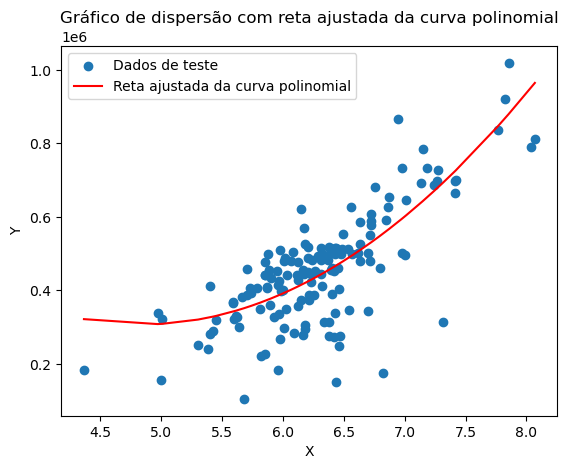

In [88]:
# plot da reta ajustada da curva polinomial
plt.scatter(x_teste, y_teste, label='Dados de teste')
x_poly_teste_sort = np.sort(x_poly_teste, axis=0)
y_pred_sort = reg_polinomial.predict(x_poly_teste_sort)
plt.plot(x_poly_teste_sort[:, 1], y_pred_sort, label='Reta ajustada da curva polinomial', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dispersão com reta ajustada da curva polinomial')
plt.legend()
plt.show()